In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('kc-house-data(1).csv', sep=',', encoding='Windows-1251')

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Задание 1

### 1.1. Скачать данные

### 1.2. Изучите стоимости недвижимости

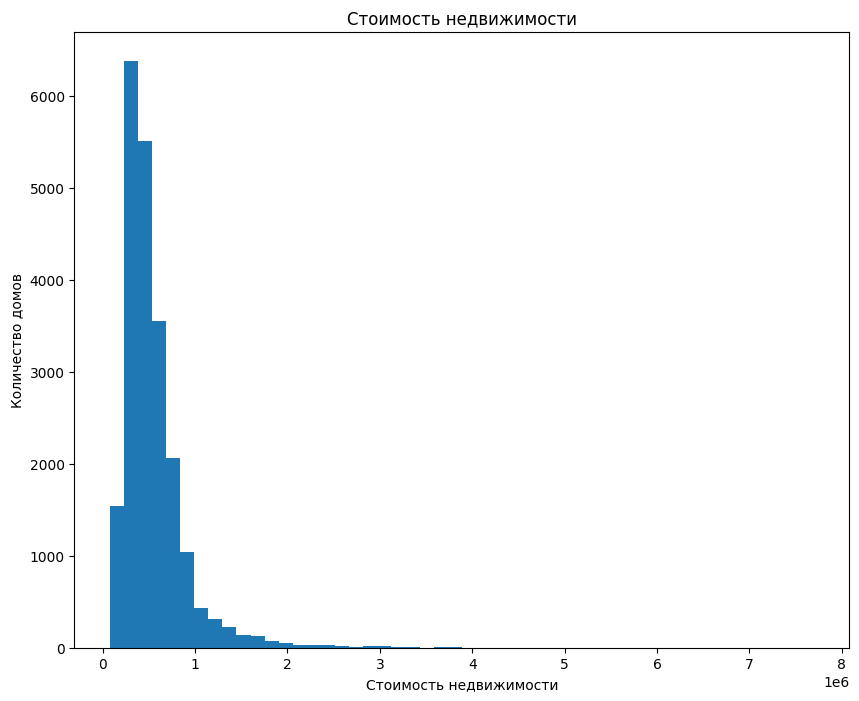

In [7]:
plt.figure(figsize = (10, 8))

plt.hist(df['price'], bins = 50)
plt.title('Стоимость недвижимости')
plt.xlabel('Стоимость недвижимости')
plt.ylabel('Количество домов');

На данном графике можно увидеть, что больше всего домов располагаются в диапазоне цен до 100 000

### 1.3. Изучите распределение квадратуры жилой

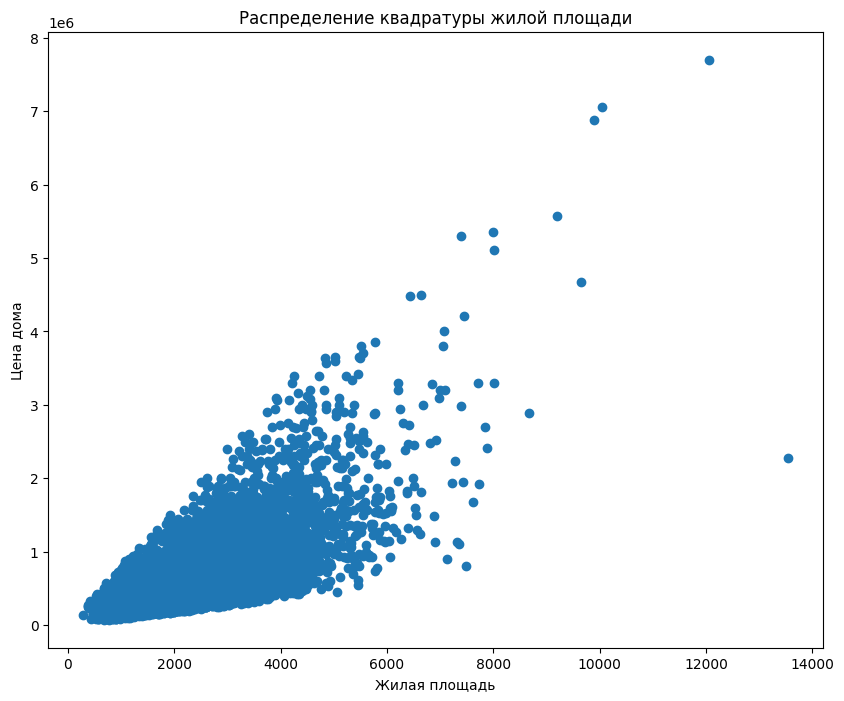

In [8]:
plt.figure(figsize = (10, 8))
plt.scatter(df['sqft_living'], df['price'])
plt.title('Распределение квадратуры жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Цена дома');

На графике видно ярко выраженная линейная зависимость количества жилой площади от цены дома. Чем больше жилая площадь, тем больше и цена.

### 1.4. Изучите распределение года постройки

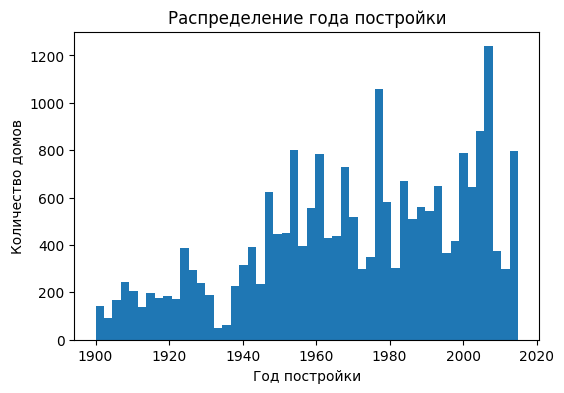

In [9]:
plt.figure(figsize=(6, 4))

plt.hist(df['yr_built'], bins=50)
plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Количество домов');

Большая часть домов приходится на постройки годов с 1950-х по 2010-е.

## Задание 2

In [10]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 2.1. Изучите распределение домов от наличия вида на набережную

In [11]:
data = df['waterfront'].value_counts()
data

waterfront
0    21450
1      163
Name: count, dtype: int64

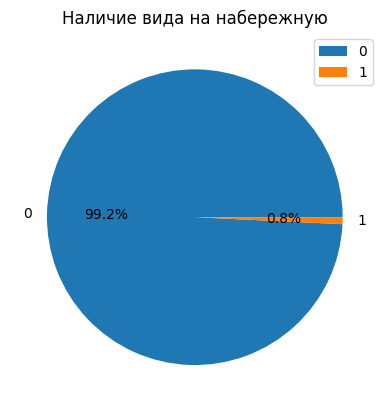

In [12]:
plt.pie(data.values, autopct='%1.1f%%', labels=data.index)
plt.legend(data.index)
plt.title('Наличие вида на набережную');

0.8% домов имеют вид на набережную

### 2.2. Изучите распределение этажей домов

In [13]:
data = df['floors'].value_counts()
data

floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64

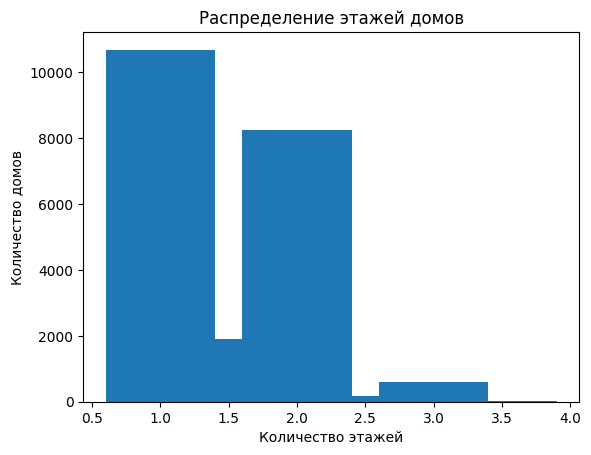

In [14]:
plt.bar(data.index, data.values)
plt.xlabel('Количество этажей')
plt.ylabel('Количество домов')
plt.title('Распределение этажей домов')
plt.xticks();

Большинство домов имеют не более 2 этажей

### 2.3. Изучите распределение состояния домов

In [15]:
data = df['condition'].value_counts().sort_index()
data

condition
1       30
2      172
3    14031
4     5679
5     1701
Name: count, dtype: int64

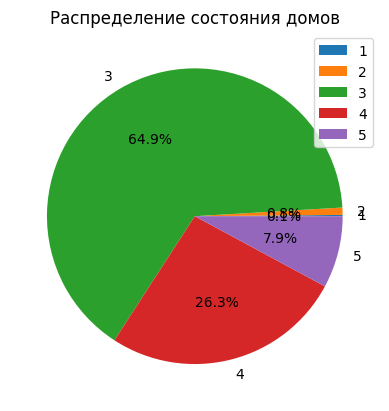

In [16]:
plt.pie(data.values, autopct='%1.1f%%', labels=data.index)
plt.legend(data.index)
plt.title('Распределение состояния домов');

В плохом состоянии(оценки 1 и 2) малое количество домов, треть домов имеют хорошее и отличное состояние(оценки 4 и 5), подавляющее большинство домов имеют среднее состояние(оценка 3)

## Задание 3
### Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока. Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [17]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Матрица корреляций

In [22]:
df1 = df[['price', 'bedrooms', 'view', 'floors', 'waterfront', 'lat', 'long']]
df1

,price,bedrooms,view,floors,waterfront,lat,long
0,221900.0,3,0,1.0,0,47.5112,-122.257
1,538000.0,3,0,2.0,0,47.7210,-122.319
2,180000.0,2,0,1.0,0,47.7379,-122.233
3,604000.0,4,0,1.0,0,47.5208,-122.393
4,510000.0,3,0,1.0,0,47.6168,-122.045
...,...,...,...,...,...,...,...
21608,360000.0,3,0,3.0,0,47.6993,-122.346
21609,400000.0,4,0,2.0,0,47.5107,-122.362
21610,402101.0,2,0,2.0,0,47.5944,-122.299
21611,400000.0,3,0,2.0,0,47.5345,-122.069


In [23]:
corr_matrix = df1.corr()
corr_matrix

,price,bedrooms,view,floors,waterfront,lat,long
price,1.000000,0.308350,0.397293,0.256794,0.266369,0.307003,0.021626
bedrooms,0.308350,1.000000,0.079532,0.175429,-0.006582,-0.008931,0.129473
view,0.397293,0.079532,1.000000,0.029444,0.401857,0.006157,-0.078400
floors,0.256794,0.175429,0.029444,1.000000,0.023698,0.049614,0.125419
waterfront,0.266369,-0.006582,0.401857,0.023698,1.000000,-0.014274,-0.041910
lat,0.307003,-0.008931,0.006157,0.049614,-0.014274,1.000000,-0.135512
long,0.021626,0.129473,-0.078400,0.125419,-0.041910,-0.135512,1.000000


Text(0.5, 1.0, 'Матрица корреляций')

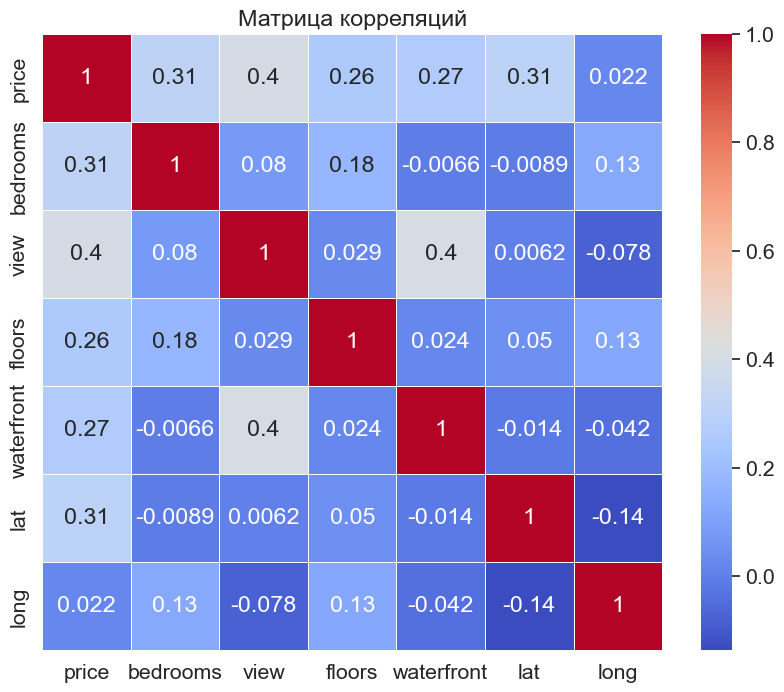

In [24]:
plt.figure(figsize=(10, 8))

sns.set(font_scale=1.4)

sns.heatmap(corr_matrix, annot=True, linewidth=.5, cmap='coolwarm')

plt.title('Матрица корреляций')

Из матрицы корреляций видно, что на цену дома больше всего влияет вид(0.4), менее количество спален и широта по 0.31, и по 0.27 и 0.26 на цену влияют вид на набережную и количество этажей соответственно. Менее всего(0.022) на цену влияет долгота.

### Статичная карта

In [1]:
min_long = -122.599
max_long = -121.137

min_lat = 47.092
max_lat = 47.944

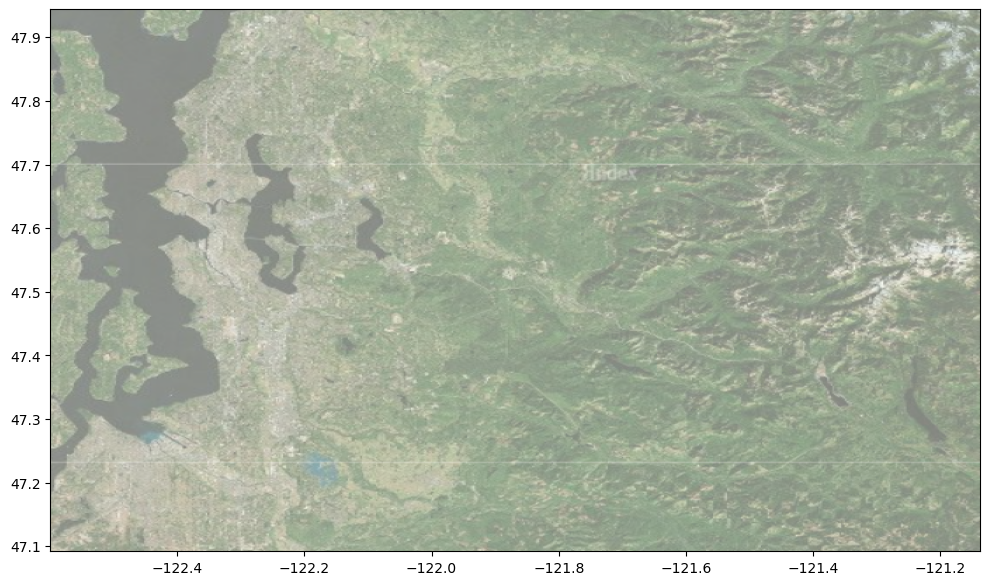

In [5]:
import matplotlib.image as img
kc_map = img.imread('kc_house.png')

plt.figure(figsize=(12,9))
plt.imshow(kc_map,
           extent=[min_long, max_long, min_lat, max_lat], alpha=0.5);

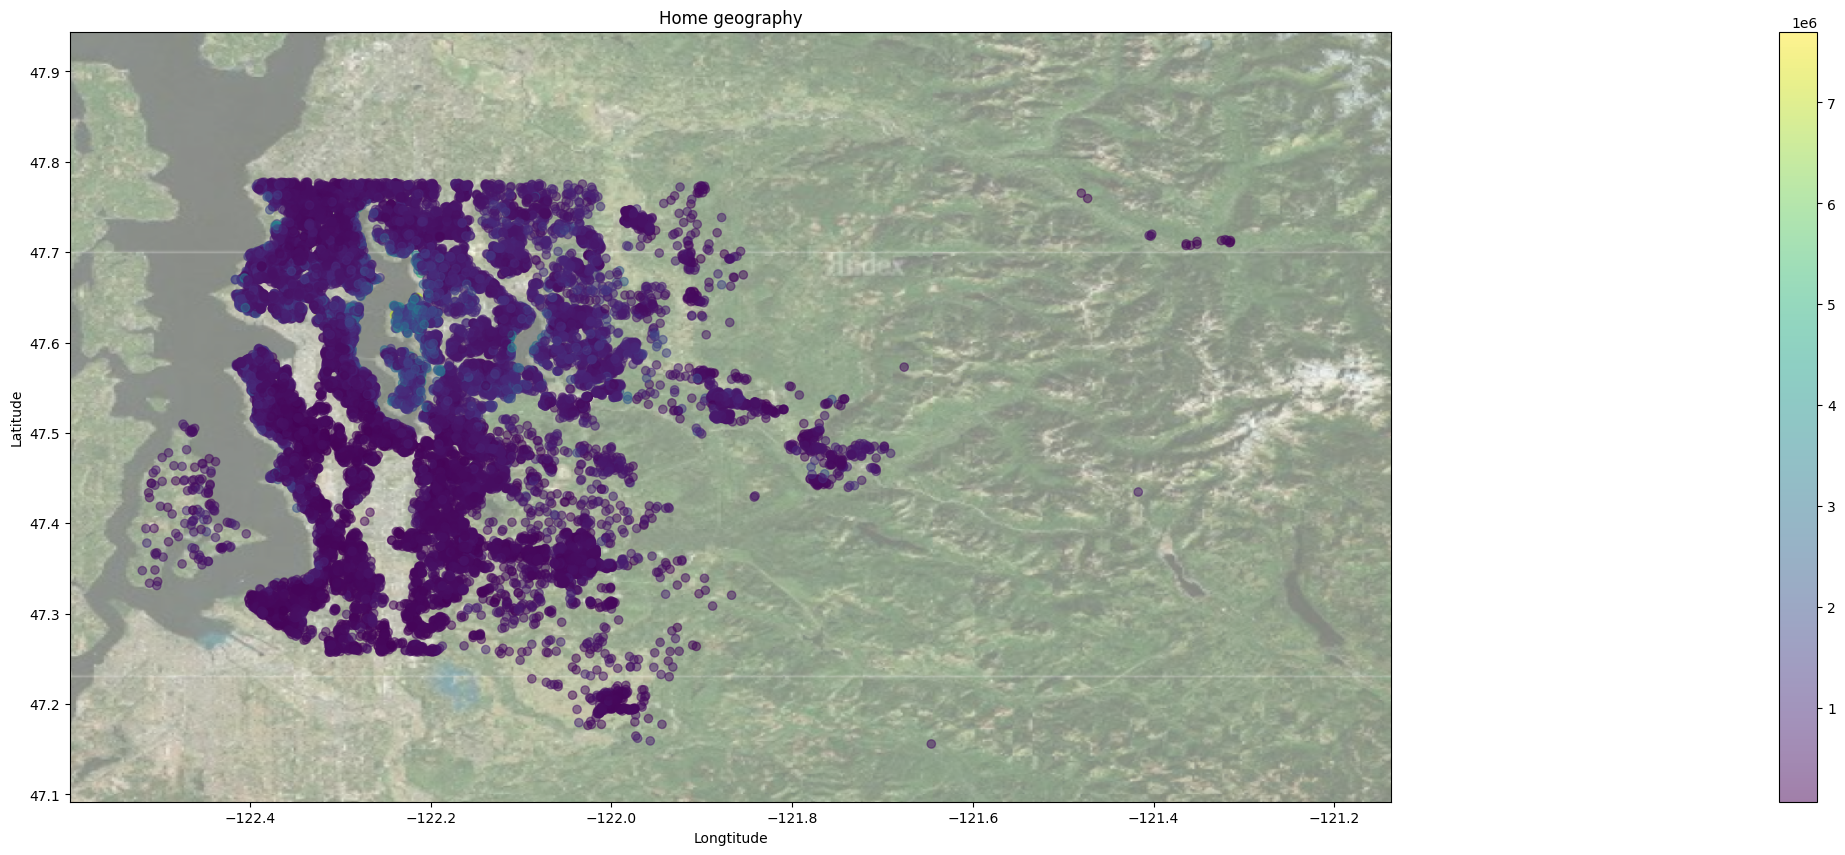

In [9]:
plt.figure(figsize=(100,10))

sc = plt.scatter(df['long'], df['lat'], alpha=0.5, c = df['price'])

plt.imshow(kc_map,
           extent=[min_long, max_long, min_lat, max_lat], alpha=0.5)

plt.colorbar(sc)
plt.xlabel('Longtitude')
plt.ylabel('Latitude')
plt.title('Home geography');

На данной карте можно увидеть, что стоимость домов выше в центре города и на побережье

### Kepler

In [ ]:
from keplergl import KeplerGl

map_ = KeplerGl(height=700)
map_.add_data(df, 'Data')
map_.save_to_html(file_name='./kc_house.html')

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
Map saved to ./kc_house.html!


<image src="kepler_image.png">

В сравнении со статичной картой на данном изображении явно видно, что недвижимость в центре города и на побережье стоит выше чем на окраине города и в глубине материка.